In [27]:
import pandas as pd
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import (
    mean_absolute_error,
    root_mean_squared_error,
    mean_absolute_percentage_error,
)
import matplotlib.pyplot as plt

In [28]:
# Variables
# In/Out:
occupancy_source = "../../output/cut-data.csv"
unix_timestamp = int(time.time())
output_file = (
    "../../output/random-forest/random-forest-%d.csv" % unix_timestamp
)
# relevant for model
target_days = 31
rf_regressor_params = {
    "n_estimators": 250,
    "criterion": "squared_error",
    "max_depth": None,
    "min_samples_split": 2,
    "min_samples_leaf": 1,
    "min_weight_fraction_leaf": 0.0,
    "max_features": 1.0,
    "max_leaf_nodes": None,
    "min_impurity_decrease": 0.0,
    "bootstrap": True,
    "oob_score": False,
    "n_jobs": None,
    "random_state": None,
    "verbose": 0,
    "warm_start": False,
    "ccp_alpha": 0.0,
    "max_samples": None,
    "monotonic_cst": None,
}

In [29]:
# Load CSV, set date as index
data = pd.read_csv(occupancy_source)
data["dates"] = pd.to_datetime(data["dates"], format="%Y-%m-%d")
data.set_index("dates", inplace=True)
data["target"] = data["occupancy"].astype(int)
# Add Columns used as features
data["day_of_year"] = data.index.dayofyear
data["day_of_week"] = data.index.dayofweek
data["month"] = data.index.month
data["year"] = data.index.year

In [30]:
# split data into features and target
x = data[["day_of_year", "day_of_week", "month", "year"]]
y = data["target"]
# split into training and test data
x_train = x.iloc[: x.shape[0] - target_days]
x_test = x.iloc[x.shape[0] - target_days :]
y_train = y.iloc[: x.shape[0] - target_days]
y_test = y.iloc[x.shape[0] - target_days :]


In [31]:
rf_model = RandomForestRegressor(**rf_regressor_params)
rf_model.fit(x_train, y_train)
latest_date = data.index.max()
prediction_dates = [
    latest_date + pd.DateOffset(days=i) for i in range(1 + target_days * -1, 1)
]
future_features = pd.DataFrame(index=prediction_dates, columns=x.columns)
future_features["day_of_year"] = [date.dayofyear for date in prediction_dates]
future_features["day_of_week"] = [date.dayofweek for date in prediction_dates]
future_features["month"] = [date.month for date in prediction_dates]
future_features["year"] = [date.year for date in prediction_dates]
future_predictions = rf_model.predict(future_features)
future_features["predictions"] = future_predictions.astype(int)


Fold: 0
2019-03-01 00:00:00 > expected=145, predicted=154
2019-03-02 00:00:00 > expected=146, predicted=149
2019-03-03 00:00:00 > expected=149, predicted=143
2019-03-04 00:00:00 > expected=156, predicted=140
2019-03-05 00:00:00 > expected=156, predicted=137
2019-03-06 00:00:00 > expected=160, predicted=136
2019-03-07 00:00:00 > expected=151, predicted=133
2019-03-08 00:00:00 > expected=148, predicted=134
2019-03-09 00:00:00 > expected=143, predicted=134
2019-03-10 00:00:00 > expected=130, predicted=133
2019-03-11 00:00:00 > expected=135, predicted=136
2019-03-12 00:00:00 > expected=139, predicted=141
2019-03-13 00:00:00 > expected=127, predicted=144
2019-03-14 00:00:00 > expected=124, predicted=144
2019-03-15 00:00:00 > expected=130, predicted=144
2019-03-16 00:00:00 > expected=124, predicted=145
2019-03-17 00:00:00 > expected=130, predicted=141
2019-03-18 00:00:00 > expected=133, predicted=148
2019-03-19 00:00:00 > expected=151, predicted=151
2019-03-20 00:00:00 > expected=144, predic

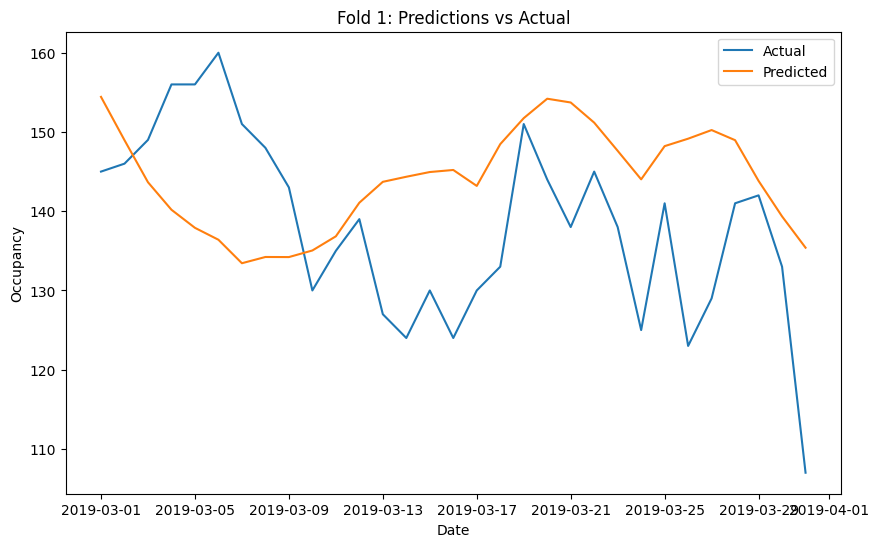

Root Mean Squared Error:  14.447904190015622
Mean Absolute Error:  12.225806451612904
Mean Absolute Percentage Error:  0.09124292778133795
Fold: 1
2019-03-01 00:00:00 > expected=145, predicted=154
2019-03-02 00:00:00 > expected=146, predicted=148
2019-03-03 00:00:00 > expected=149, predicted=143
2019-03-04 00:00:00 > expected=156, predicted=140
2019-03-05 00:00:00 > expected=156, predicted=137
2019-03-06 00:00:00 > expected=160, predicted=136
2019-03-07 00:00:00 > expected=151, predicted=133
2019-03-08 00:00:00 > expected=148, predicted=134
2019-03-09 00:00:00 > expected=143, predicted=134
2019-03-10 00:00:00 > expected=130, predicted=135
2019-03-11 00:00:00 > expected=135, predicted=136
2019-03-12 00:00:00 > expected=139, predicted=141
2019-03-13 00:00:00 > expected=127, predicted=143
2019-03-14 00:00:00 > expected=124, predicted=144
2019-03-15 00:00:00 > expected=130, predicted=144
2019-03-16 00:00:00 > expected=124, predicted=145
2019-03-17 00:00:00 > expected=130, predicted=143
201

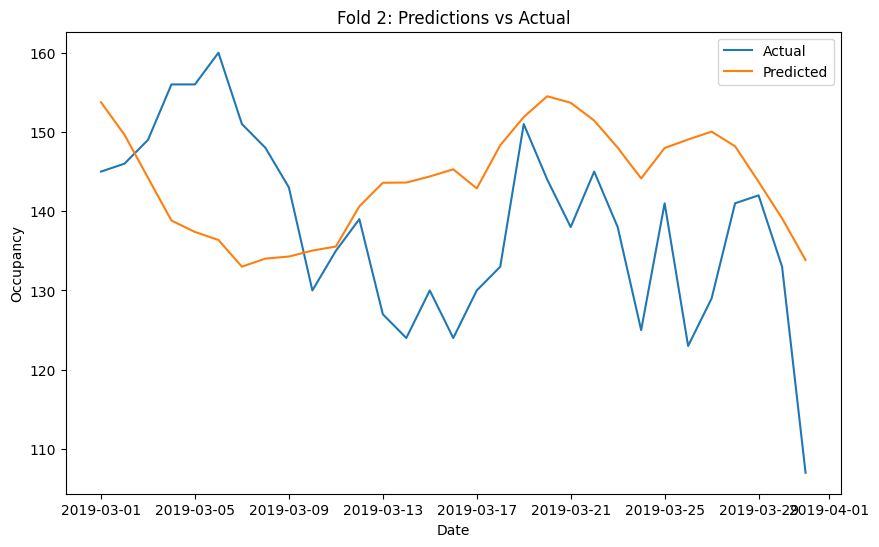

Root Mean Squared Error:  14.307678966881905
Mean Absolute Error:  12.064516129032258
Mean Absolute Percentage Error:  0.08986118521297724
Fold: 2
2019-03-01 00:00:00 > expected=145, predicted=153
2019-03-02 00:00:00 > expected=146, predicted=149
2019-03-03 00:00:00 > expected=149, predicted=144
2019-03-04 00:00:00 > expected=156, predicted=138
2019-03-05 00:00:00 > expected=156, predicted=137
2019-03-06 00:00:00 > expected=160, predicted=136
2019-03-07 00:00:00 > expected=151, predicted=133
2019-03-08 00:00:00 > expected=148, predicted=134
2019-03-09 00:00:00 > expected=143, predicted=134
2019-03-10 00:00:00 > expected=130, predicted=135
2019-03-11 00:00:00 > expected=135, predicted=135
2019-03-12 00:00:00 > expected=139, predicted=140
2019-03-13 00:00:00 > expected=127, predicted=143
2019-03-14 00:00:00 > expected=124, predicted=143
2019-03-15 00:00:00 > expected=130, predicted=144
2019-03-16 00:00:00 > expected=124, predicted=145
2019-03-17 00:00:00 > expected=130, predicted=142
201

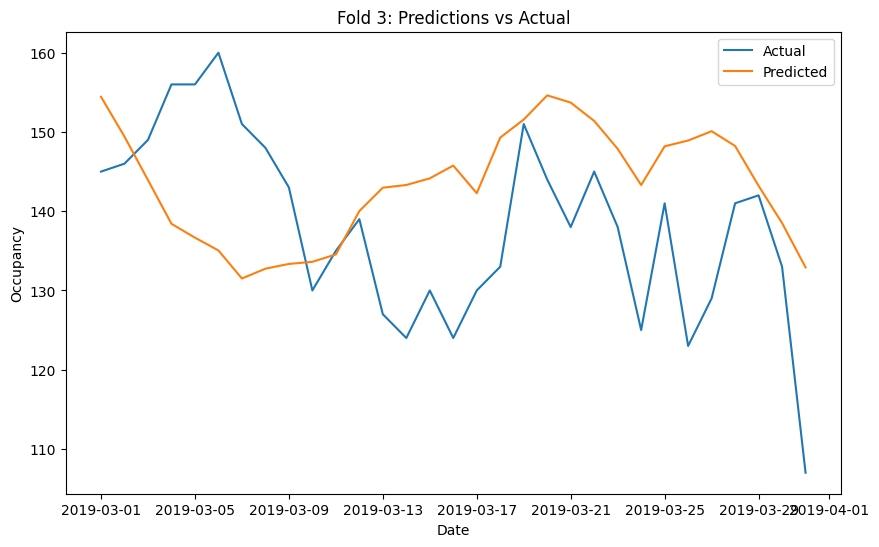

Root Mean Squared Error:  14.419968234048497
Mean Absolute Error:  12.193548387096774
Mean Absolute Percentage Error:  0.09045920113235988
Fold: 3
2019-03-01 00:00:00 > expected=145, predicted=154
2019-03-02 00:00:00 > expected=146, predicted=149
2019-03-03 00:00:00 > expected=149, predicted=143
2019-03-04 00:00:00 > expected=156, predicted=138
2019-03-05 00:00:00 > expected=156, predicted=136
2019-03-06 00:00:00 > expected=160, predicted=135
2019-03-07 00:00:00 > expected=151, predicted=131
2019-03-08 00:00:00 > expected=148, predicted=132
2019-03-09 00:00:00 > expected=143, predicted=133
2019-03-10 00:00:00 > expected=130, predicted=133
2019-03-11 00:00:00 > expected=135, predicted=134
2019-03-12 00:00:00 > expected=139, predicted=140
2019-03-13 00:00:00 > expected=127, predicted=142
2019-03-14 00:00:00 > expected=124, predicted=143
2019-03-15 00:00:00 > expected=130, predicted=144
2019-03-16 00:00:00 > expected=124, predicted=145
2019-03-17 00:00:00 > expected=130, predicted=142
201

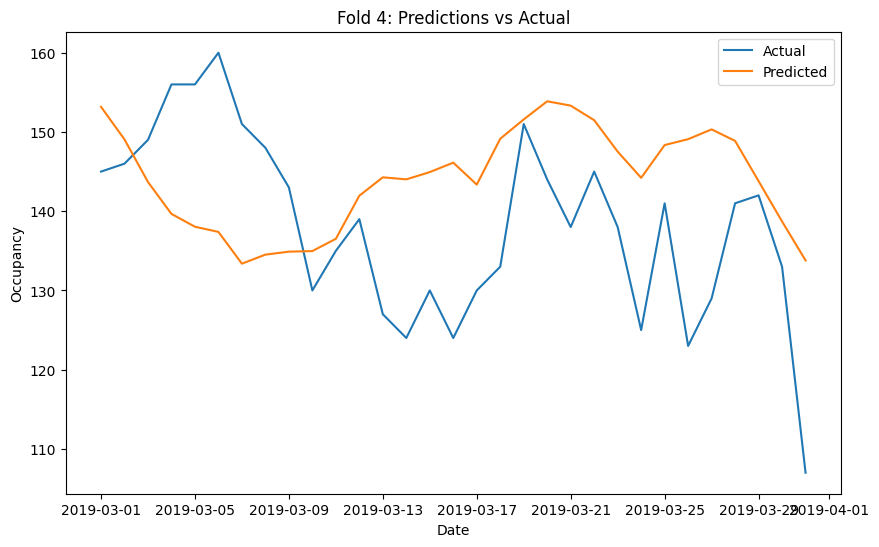

Root Mean Squared Error:  14.332458087805792
Mean Absolute Error:  12.129032258064516
Mean Absolute Percentage Error:  0.0904788295329386
Fold: 4
2019-03-01 00:00:00 > expected=145, predicted=153
2019-03-02 00:00:00 > expected=146, predicted=149
2019-03-03 00:00:00 > expected=149, predicted=143
2019-03-04 00:00:00 > expected=156, predicted=139
2019-03-05 00:00:00 > expected=156, predicted=138
2019-03-06 00:00:00 > expected=160, predicted=137
2019-03-07 00:00:00 > expected=151, predicted=133
2019-03-08 00:00:00 > expected=148, predicted=134
2019-03-09 00:00:00 > expected=143, predicted=134
2019-03-10 00:00:00 > expected=130, predicted=134
2019-03-11 00:00:00 > expected=135, predicted=136
2019-03-12 00:00:00 > expected=139, predicted=141
2019-03-13 00:00:00 > expected=127, predicted=144
2019-03-14 00:00:00 > expected=124, predicted=144
2019-03-15 00:00:00 > expected=130, predicted=144
2019-03-16 00:00:00 > expected=124, predicted=146
2019-03-17 00:00:00 > expected=130, predicted=143
2019

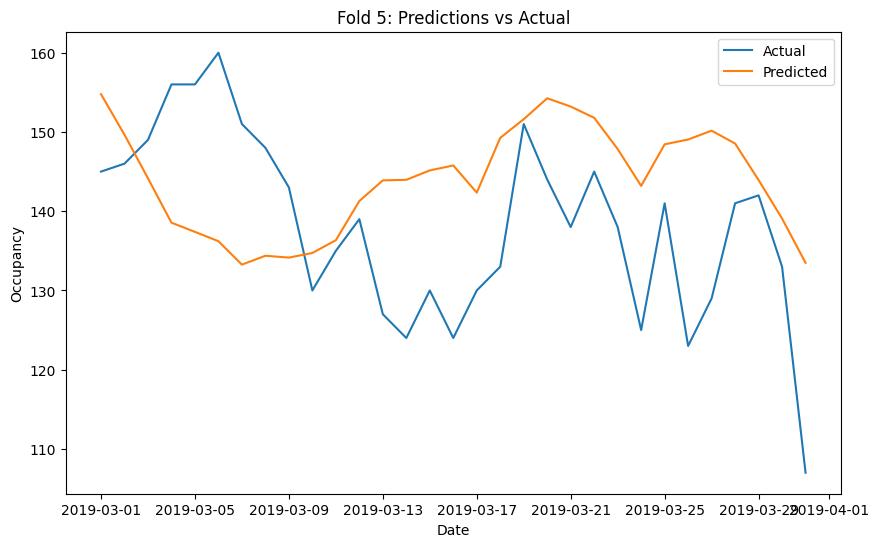

Root Mean Squared Error:  14.340333374448537
Mean Absolute Error:  12.161290322580646
Mean Absolute Percentage Error:  0.09053417948711626


In [41]:
n_splits = 5
time_series_split = TimeSeriesSplit(n_splits)

for fold, (train_index, test_index) in enumerate(time_series_split.split(x)):
   
    print("Fold: {}".format(fold))
    out = "target_days = %s\nrf_regressor_params = \n" % target_days
    for k, v in rf_regressor_params.items():
        out += f"\t{k} = {v}\n"
    out += "date,occupancy,prediction\n"
    for index in y_test.index:
        out += "%s,%i,%i\n" % (
            index,
            y_test.loc[index],
            future_features["predictions"].loc[index],
        )
        print(
            "%s > expected=%i, predicted=%i"
            % (index, y_test.loc[index], future_features["predictions"].loc[index])
        )

    if out.endswith("\n"):
        out = out[:-1]
        
    rf_model = RandomForestRegressor(**rf_regressor_params)
    rf_model.fit(x_train, y_train)
    latest_date = data.index.max()
    prediction_dates = [
        latest_date + pd.DateOffset(days=i) for i in range(1 + target_days * -1, 1)
    ]
    future_features = pd.DataFrame(index=prediction_dates, columns=x.columns)
    future_features["day_of_year"] = [date.dayofyear for date in prediction_dates]
    future_features["day_of_week"] = [date.dayofweek for date in prediction_dates]
    future_features["month"] = [date.month for date in prediction_dates]
    future_features["year"] = [date.year for date in prediction_dates]
    future_predictions = rf_model.predict(future_features)
    future_features["predictions"] = future_predictions.astype(int)

    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index, y_test, label='Actual')
    plt.plot(y_test.index, future_predictions, label='Predicted')
    plt.xlabel('Date')
    plt.ylabel('Occupancy')
    plt.title(f'Fold {fold+1}: Predictions vs Actual')
    plt.legend()
    plt.show()

    rmse = root_mean_squared_error(y_test.tail(target_days), future_features["predictions"])
    mea = mean_absolute_error(y_test.tail(target_days), future_features["predictions"])
    mape = mean_absolute_percentage_error(y_test.tail(target_days), future_features["predictions"])

    print("Root Mean Squared Error: ", rmse)
    print("Mean Absolute Error: ", mea)
    print("Mean Absolute Percentage Error: ", mape)

    
       

In [34]:
out = "target_days = %s\nrf_regressor_params = \n" % target_days
for k, v in rf_regressor_params.items():
    out += f"\t{k} = {v}\n"
out += "date,occupancy,prediction\n"
for index in y_test.index:
    out += "%s,%i,%i\n" % (
        index,
        y_test.loc[index],
        future_features["predictions"].loc[index],
    )
    print(
        "%s > expected=%i, predicted=%i"
        % (index, y_test.loc[index], future_features["predictions"].loc[index])
    )

if out.endswith("\n"):
    out = out[:-1]

rmse = root_mean_squared_error(
    y_test.tail(target_days), future_features["predictions"]
)
mea = mean_absolute_error(
    y_test.tail(target_days), future_features["predictions"]
)
mape = mean_absolute_percentage_error(
    y_test.tail(target_days), future_features["predictions"]
)

print("Root Mean Squared Error: ", rmse)
print("Mean Absolute Error: ", mea)
print("Mean Absolute Percentage Error: ", mape)

#print(out)
#with open(output_file, "w") as f:
#    f.write(out)


2019-03-01 00:00:00 > expected=145, predicted=153
2019-03-02 00:00:00 > expected=146, predicted=149
2019-03-03 00:00:00 > expected=149, predicted=143
2019-03-04 00:00:00 > expected=156, predicted=139
2019-03-05 00:00:00 > expected=156, predicted=137
2019-03-06 00:00:00 > expected=160, predicted=136
2019-03-07 00:00:00 > expected=151, predicted=132
2019-03-08 00:00:00 > expected=148, predicted=133
2019-03-09 00:00:00 > expected=143, predicted=133
2019-03-10 00:00:00 > expected=130, predicted=134
2019-03-11 00:00:00 > expected=135, predicted=135
2019-03-12 00:00:00 > expected=139, predicted=140
2019-03-13 00:00:00 > expected=127, predicted=143
2019-03-14 00:00:00 > expected=124, predicted=143
2019-03-15 00:00:00 > expected=130, predicted=144
2019-03-16 00:00:00 > expected=124, predicted=145
2019-03-17 00:00:00 > expected=130, predicted=142
2019-03-18 00:00:00 > expected=133, predicted=148
2019-03-19 00:00:00 > expected=151, predicted=150
2019-03-20 00:00:00 > expected=144, predicted=154
